In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Description

### Content
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"

    objid = Object Identifier
    ra = J2000 Right Ascension (r-band)
    dec = J2000 Declination (r-band)
    
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension


The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

    u = better of DeV/Exp magnitude fit
    g = better of DeV/Exp magnitude fit
    r = better of DeV/Exp magnitude fit
    i = better of DeV/Exp magnitude fit
    z = better of DeV/Exp magnitude fit
    
https://classic.sdss.org/dr2/instruments/technicalPaper/index.html    

The five filters in the imaging array of the camera, [u,   g,   r,   i and z] have effective wavelengths of [3590 Å, 4810 Å, 6230 Å, 7640 Å and 9060 Å]


    run = Run Number
    rereun = Rerun Number
    camcol = Camera column
    field = Field number
   

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

    run number, which identifies the specific scan,
    the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
    the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
    An additional number, rerun, specifies how the image was processed.
    
View "SpecObj"

    specobjid = Object Identifier
    class = object class (galaxy, star or quasar object)
    
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

    redshift = Final Redshift
    plate = plate number
    mjd = MJD of observation
    fiberid = fiber ID
    
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Further information on SDSS images and their attributes:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### Retrieval of data 

You need a login and password to submit queries here:
http://skyserver.sdss.org/CasJobs/SubmitJob.aspx

The query I used for retrieving the data was:



The syntax is not quite the same as SQL. A JOIN statement was not required. It was taken care of in the WHERE statement. There's an INTO statement which specifies a name of the output (maybe view?). I was then able to download the data as a csv.

In [37]:
df = pd.read_csv('sloan_survey_clean.csv')

In [39]:
df = df.drop('index', axis=1)

In [41]:
df.to_csv('sloan_survey_clean.csv', index=False)

In [42]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922,512


In [43]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [33]:
df['redshift'].groupby(df['class']).mean()

class
GALAXY    0.080325
QSO       1.218366
STAR      0.000043
Name: redshift, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [46]:
df_ps=pd.read_csv('PhotoSpec.csv')

In [47]:
df_ps.head()

,ObjID,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class
0,1237661069242400774,136.452912,9.771667,19.08904,17.89999,17.43596,17.27192,17.19835,3631,3,134,0.000006,1738,53051,639,STAR
1,1237661069779075243,135.941401,10.063623,21.76802,19.07968,17.91936,17.53843,17.32779,3631,4,131,-0.000076,1738,53051,590,STAR
2,1237662199901585886,244.639052,6.857377,19.74054,18.33654,17.60172,17.20815,16.93571,3894,5,272,0.132699,1732,53501,216,GALAXY
3,1237662199901651427,244.723628,6.938107,19.53688,18.60031,18.13543,17.78521,17.64686,3894,5,273,0.125544,1732,53501,184,GALAXY
4,1237662199901782339,245.127667,6.907594,18.08034,16.87509,16.89053,16.92975,16.99685,3894,5,275,0.000262,1732,53501,191,STAR


In [ ]:
df_ps

In [8]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
ObjID       10000 non-null int64
ra          10000 non-null float64
dec         10000 non-null float64
u           10000 non-null float64
g           10000 non-null float64
r           10000 non-null float64
i           10000 non-null float64
z           10000 non-null float64
run         10000 non-null int64
camcol      10000 non-null int64
field       10000 non-null int64
redshift    10000 non-null float64
plate       10000 non-null int64
mjd         10000 non-null int64
fiberid     10000 non-null int64
class       10000 non-null object
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [12]:
df_ps['class'].value_counts()

GALAXY    7930
STAR      1388
QSO        682
Name: class, dtype: int64

In [14]:
df_ps.describe()

,ObjID,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237662e+18,159.921617,15.619477,20.097348,18.458802,17.566829,17.139804,16.852177,3933.526500,3.404500,192.090300,0.181907,1738.231400,53354.025100,316.612500
std,3.185974e+12,45.955573,12.391243,1.692615,1.398189,1.234087,1.181479,1.200940,741.858251,1.573444,151.604045,0.304171,52.448294,399.581423,192.174407
min,1.237646e+18,0.014610,-1.250880,12.789010,11.577730,11.109340,11.029630,10.420360,109.000000,1.000000,11.000000,-0.001254,1517.000000,52930.000000,1.000000
25%,1.237661e+18,130.865984,9.100017,19.104163,17.686717,16.905440,16.505747,16.193720,3631.000000,2.000000,72.000000,0.053144,1735.000000,53055.000000,144.000000
50%,1.237662e+18,158.191521,12.361648,19.824615,18.339855,17.501740,17.067490,16.768010,3894.000000,3.000000,148.000000,0.103513,1747.000000,53112.000000,307.500000
75%,1.237664e+18,190.399721,14.654994,20.719563,19.000405,18.064367,17.671075,17.416535,4338.000000,5.000000,277.250000,0.172240,1758.000000,53473.000000,494.000000
max,1.237680e+18,359.994803,65.700686,27.513610,26.170970,25.170330,26.968700,26.427790,8039.000000,6.000000,841.000000,4.178060,1837.000000,54567.000000,640.000000


In [58]:
df_ps2=pd.read_csv('PhotoSpec2.csv')

In [59]:
df_ps2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
ObjID       20000 non-null int64
ra          20000 non-null float64
dec         20000 non-null float64
u           20000 non-null float64
g           20000 non-null float64
r           20000 non-null float64
i           20000 non-null float64
z           20000 non-null float64
run         20000 non-null int64
camcol      20000 non-null int64
field       20000 non-null int64
redshift    20000 non-null float64
plate       20000 non-null int64
mjd         20000 non-null int64
fiberid     20000 non-null int64
class       20000 non-null object
dtypes: float64(8), int64(7), object(1)
memory usage: 2.4+ MB


In [60]:
df_ps2['class'].value_counts()

GALAXY    16066
STAR       2558
QSO        1376
Name: class, dtype: int64

In [61]:
df_ps2.head()

,ObjID,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class
0,1237651497367568711,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY
1,1237651497367568733,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY
2,1237651497367568809,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR
3,1237651497367634217,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY
4,1237660670884708389,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR


In [62]:
df_ps2 = df_ps2.drop('ObjID', axis=1)

In [63]:
df_ps2.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR


In [64]:
df_ps2.to_csv('PhotoSpec2_clean.csv', index=False)

In [65]:
df = pd.read_csv('PhotoSpec2_clean.csv')

In [66]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR


(array([1.9072e+04, 4.5800e+02, 4.3000e+02, 2.3000e+01, 8.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-1.98834400e-03,  6.92442090e-01,  1.38687252e+00,  2.08130296e+00,
         2.77573339e+00,  3.47016383e+00,  4.16459426e+00,  4.85902470e+00,
         5.55345513e+00,  6.24788557e+00,  6.94231600e+00]),
 <a list of 10 Patch objects>)

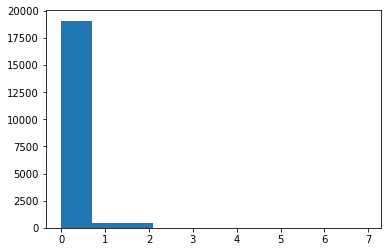

In [67]:
plt.hist(df['redshift'])

(array([1.6415e+04, 2.4700e+03, 2.8700e+02, 2.9000e+02, 4.0700e+02,
        1.1100e+02, 1.0000e+01, 4.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([-8.64386461e-04,  8.92167684e-02,  1.79297923e-01,  2.69379078e-01,
         3.59460233e-01,  4.49541388e-01,  5.39622543e-01,  6.29703698e-01,
         7.19784853e-01,  8.09866007e-01,  8.99947162e-01]),
 <a list of 10 Patch objects>)

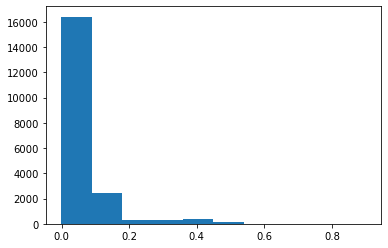

In [68]:
plt.hist(np.log10(1+df['redshift']))

In [69]:
df['log_redshift'] = np.log10(1+df['redshift'])

In [70]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY,0.022482
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY,0.053097
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR,-0.000083
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY,0.022437
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR,0.000111


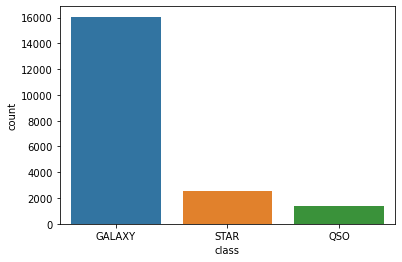

In [71]:
sns.countplot(x= "class", data = df)

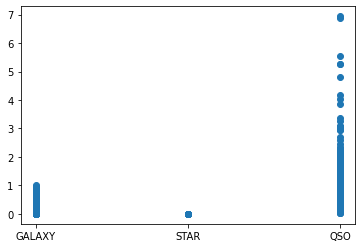

In [72]:
plt.scatter(df['class'], df['redshift'])

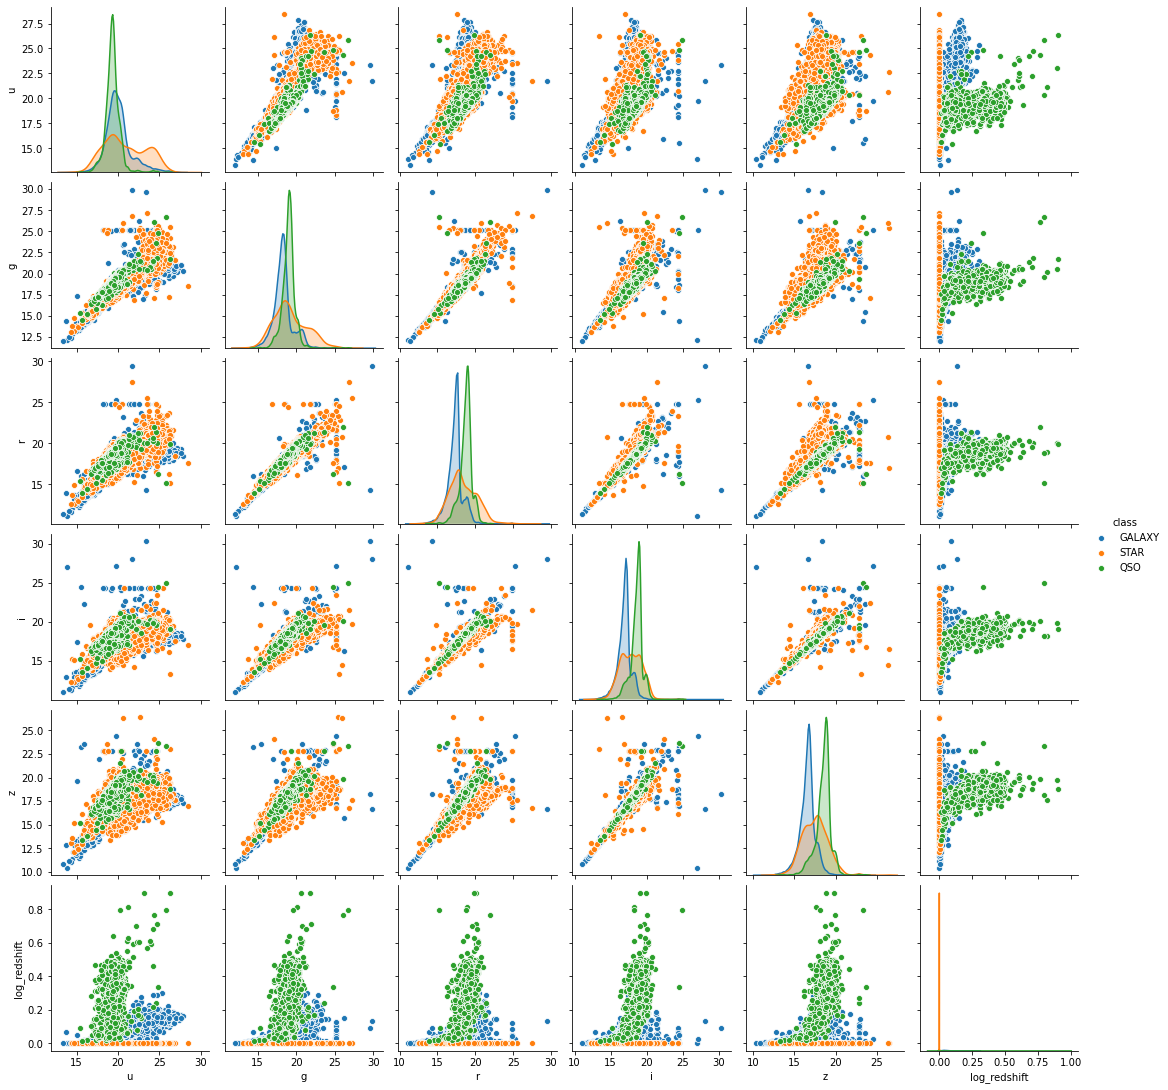

In [75]:
sns.pairplot(df.loc[:,["u", "g", "r", "i", "z", "class", 'log_redshift']], hue = "class")

In [78]:
df.to_csv('PhotoSpec2_log.csv', index=False)

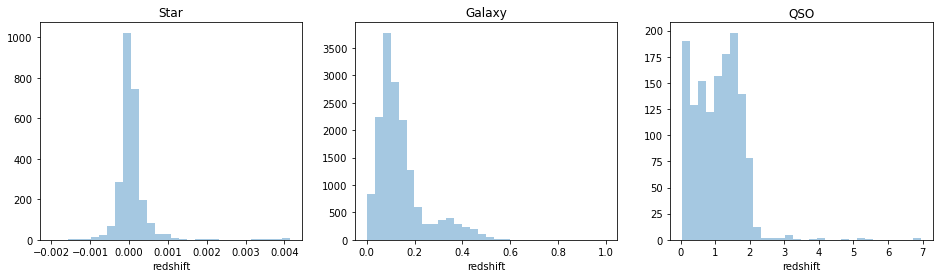

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

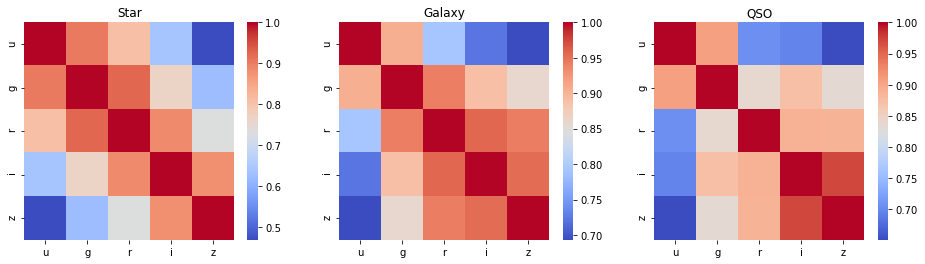

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.heatmap(df[df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(df[df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(df[df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

https://www.sdss.org/dr16/algorithms/surveycoords/

### Great circle coordiantes (μ, ν)
The first set is the Great Circle (μ, ν) system, where μ and ν are spherical coordinates (corresponding to RA and Dec) in a system whose equator is along the center of the stripe in question. The stripes in the main survey in the North Galactic Cap are great circles which all cross the survey nodes of (RA, Dec) = (95, 0) and (RA, Dec) = (275, 0) degrees.

The scans are defined by their inclination with respect to the equator, and are indexed by integers n such that the inclination of a stripe is 2.5(n - 10).

The stripes of the main survey in the South Galactic cap are great circles with the same nodes, where the indexing is such that the inclination relative to the survey equator is 2.5(82 - n). The celestial Equator therefore corresponds to stripe number 10 in the Northern Cap and 82 in the Southern Cap. Stripes 1-44 were observed in the North, and stripes 61 to 90 in the South. While the imaging scans of the SEGUE survey are also great circles, they have an assortment of different nodes and are numbered with stripe numbers > 200.


e:\Users\user\anaconda3\envs\metis\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Equatorial coordinates')

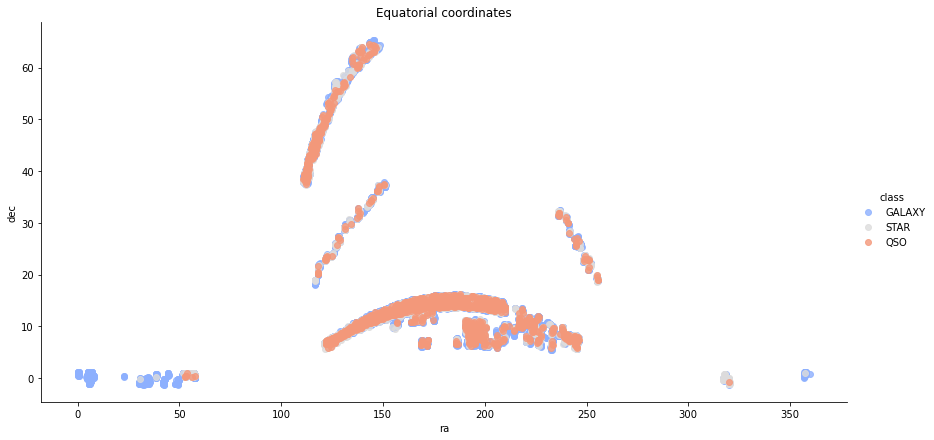

In [83]:
sns.lmplot(x='ra', y='dec', data=df, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Equatorial coordinates')

In [84]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY,0.022482
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY,0.053097
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR,-0.000083
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY,0.022437
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR,0.000111


In [85]:
df['class_binary'] = [1 if i == 'GALAXY' else 0 for i in df.loc[:,'class']]

In [86]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift,class_binary
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY,0.022482,1
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY,0.053097,1
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR,-0.000083,0
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY,0.022437,1
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR,0.000111,0


In [87]:
df.to_csv('PhotoSpec2_log.csv', index=False)